In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as grid_spec
%matplotlib inline
import seaborn as sns
from scipy import stats

In [2]:
heart_df= pd.read_csv("heart.csv")
heart_df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [3]:
heart_df.shape

(918, 12)

In [4]:
heart_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [5]:
#checking for missing values
heart_df.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [6]:
#checking for duplicates values
heart_df.duplicated().sum()

0

In [7]:
#summary statistics of the data
numerical_summary = heart_df.describe().transpose()

palette = sns.color_palette("viridis", as_cmap=True)

numerical_summary.style.background_gradient(cmap=palette)

,count,mean,std,min,25%,50%,75%,max
Age,918.000000,53.510893,9.432617,28.000000,47.000000,54.000000,60.000000,77.000000
RestingBP,918.000000,132.396514,18.514154,0.000000,120.000000,130.000000,140.000000,200.000000
Cholesterol,918.000000,198.799564,109.384145,0.000000,173.250000,223.000000,267.000000,603.000000
FastingBS,918.000000,0.233115,0.423046,0.000000,0.000000,0.000000,0.000000,1.000000
MaxHR,918.000000,136.809368,25.460334,60.000000,120.000000,138.000000,156.000000,202.000000
Oldpeak,918.000000,0.887364,1.066570,-2.600000,0.000000,0.600000,1.500000,6.200000
HeartDisease,918.000000,0.553377,0.497414,0.000000,0.000000,1.000000,1.000000,1.000000


Our dataset do not have any missing values , duplicated values. we will proceed straight to the exploratory data analysis.

                              Exploratory  Data   Analysis    

ChestPainType contains 4 types which are : 
1. ATA
2. NAP
3. ASY
4. TA
----------------------------
Count for each type :::
ChestPainType
ASY    496
NAP    203
ATA    173
TA      46
Name: count, dtype: int64
----------------------------
----------------------------


C:\Users\user1\AppData\Local\Temp\ipykernel_1872\2198568058.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=heart_df['ChestPainType'], order= ['ASY','NAP','ATA','TA'],palette=chest_pain_palette)


<function matplotlib.pyplot.show(close=None, block=None)>

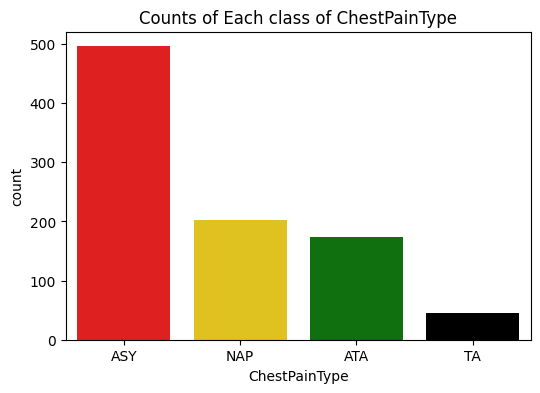

In [8]:
print("ChestPainType contains 4 types which are : ")
i=1
for x in heart_df['ChestPainType'].unique():
  print("{}. {}".format(i,x))
  i = i + 1
print("----------------------------")
print("Count for each type :::")
print(heart_df['ChestPainType'].value_counts())
print("----------------------------")
print("----------------------------")
plt.figure(figsize = (6,4))
chest_pain_palette = ['#FF0000', '#FFD700', '#008000', '#000000']
sns.countplot(x=heart_df['ChestPainType'], order= ['ASY','NAP','ATA','TA'],palette=chest_pain_palette)
plt.title("Counts of Each class of ChestPainType")
plt.show

RestingECG contains 3 types which are : 
1. Normal
2. ST
3. LVH
----------------------------
Count for each type :::
RestingECG
Normal    552
LVH       188
ST        178
Name: count, dtype: int64
----------------------------
----------------------------


C:\Users\user1\AppData\Local\Temp\ipykernel_1872\481563070.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=heart_df['RestingECG'],palette=ecg_palette)


Text(0.5, 1.0, 'Counts of Each class of RestingECG')

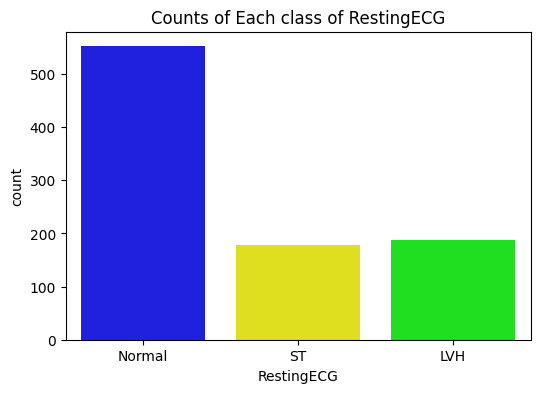

In [9]:
print("RestingECG contains 3 types which are : ")
i=1
for x in heart_df['RestingECG'].unique():
  print("{}. {}".format(i,x))
  i = i + 1
print("----------------------------")
print("Count for each type :::")
print(heart_df['RestingECG'].value_counts())
print("----------------------------")
print("----------------------------")
plt.figure(figsize = (6,4))
ecg_palette = ['#0000FF', '#FFFF00', '#00FF00']
sns.countplot(x=heart_df['RestingECG'],palette=ecg_palette)
plt.title("Counts of Each class of RestingECG")


In [10]:
binary_variables = ['Sex','FastingBS','ExerciseAngina','HeartDisease'] 
for variable in binary_variables:
    print("count for each tyoe of {} :::".format(variable))
    print(heart_df[variable].value_counts())
    print("----------------")

count for each tyoe of Sex :::
Sex
M    725
F    193
Name: count, dtype: int64
----------------
count for each tyoe of FastingBS :::
FastingBS
0    704
1    214
Name: count, dtype: int64
----------------
count for each tyoe of ExerciseAngina :::
ExerciseAngina
N    547
Y    371
Name: count, dtype: int64
----------------
count for each tyoe of HeartDisease :::
HeartDisease
1    508
0    410
Name: count, dtype: int64
----------------


C:\Users\user1\AppData\Local\Temp\ipykernel_1872\241110515.py:3: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn")


<Figure size 800x550 with 0 Axes>

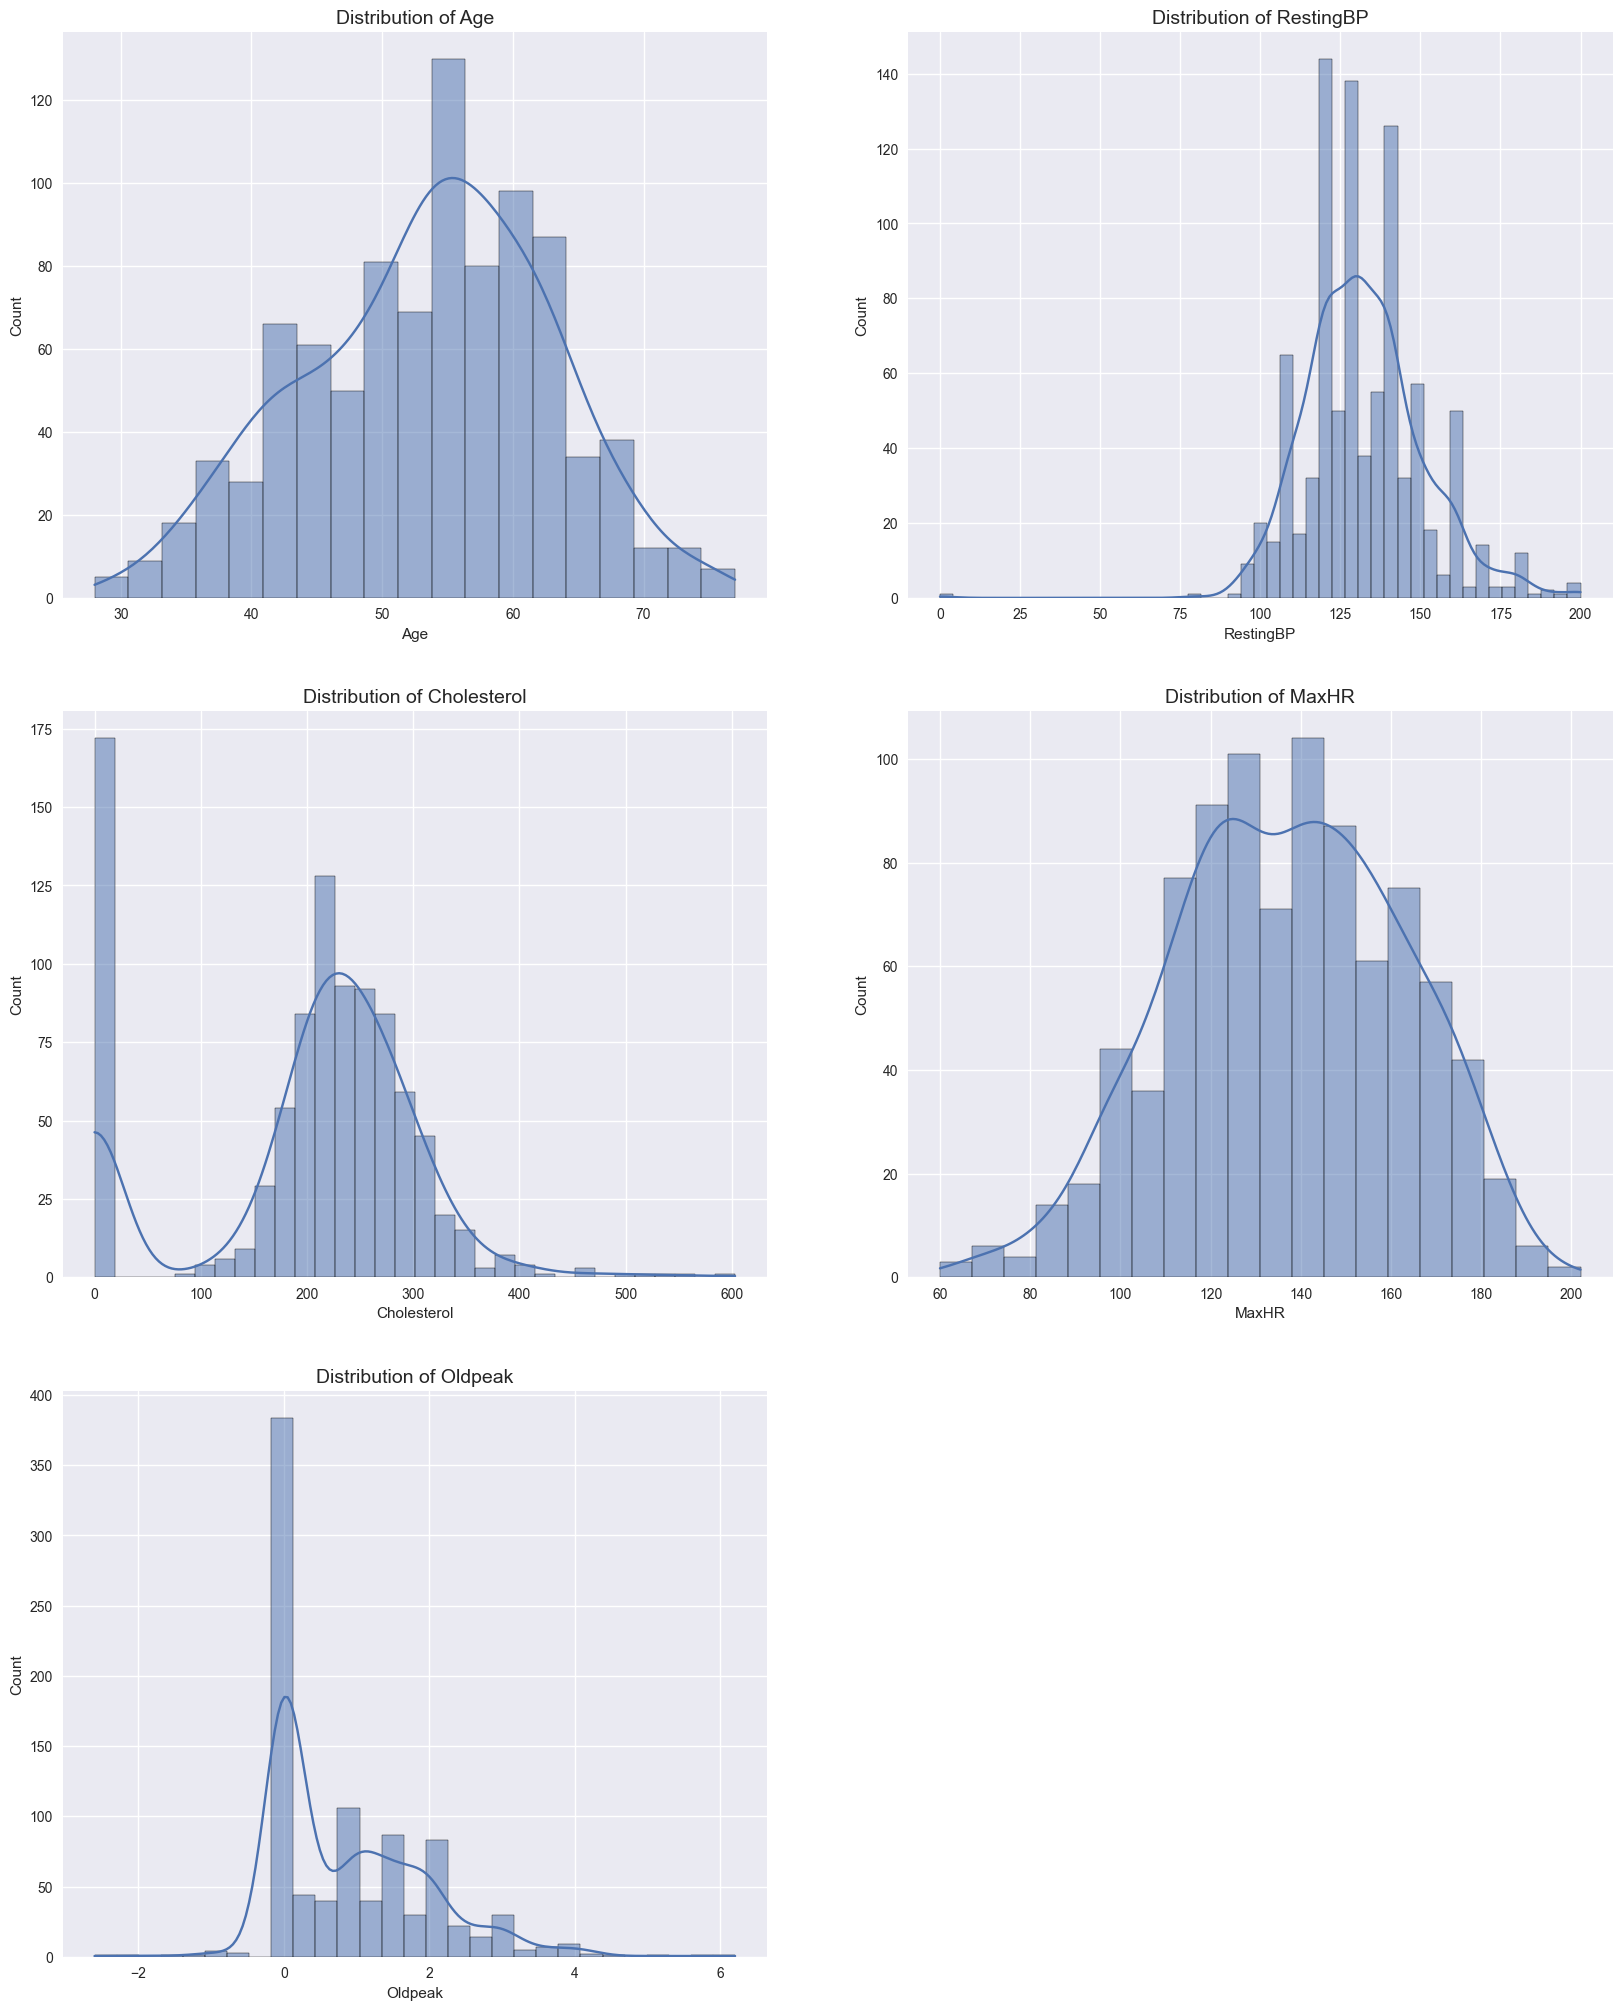

In [11]:
#Exploring the numerical variables
numerical_variables = ['Age','RestingBP','Cholesterol','MaxHR','Oldpeak']
plt.style.use("seaborn")
plt.subplots_adjust(top=0.9,hspace=6,wspace = 1)
plt.figure(figsize=(20,25))
plt.subplot(3,2,1)
i=1
for feature in heart_df.columns:
    if feature  in numerical_variables :
        plt.subplot(3,2,i)
        sns.histplot(data=heart_df, x=feature, kde=True)
        plt.title("Distribution of {}".format(feature), fontsize=14) 
        i+=1

Text(0.5, 1.0, 'Distribution of HeartDisease')

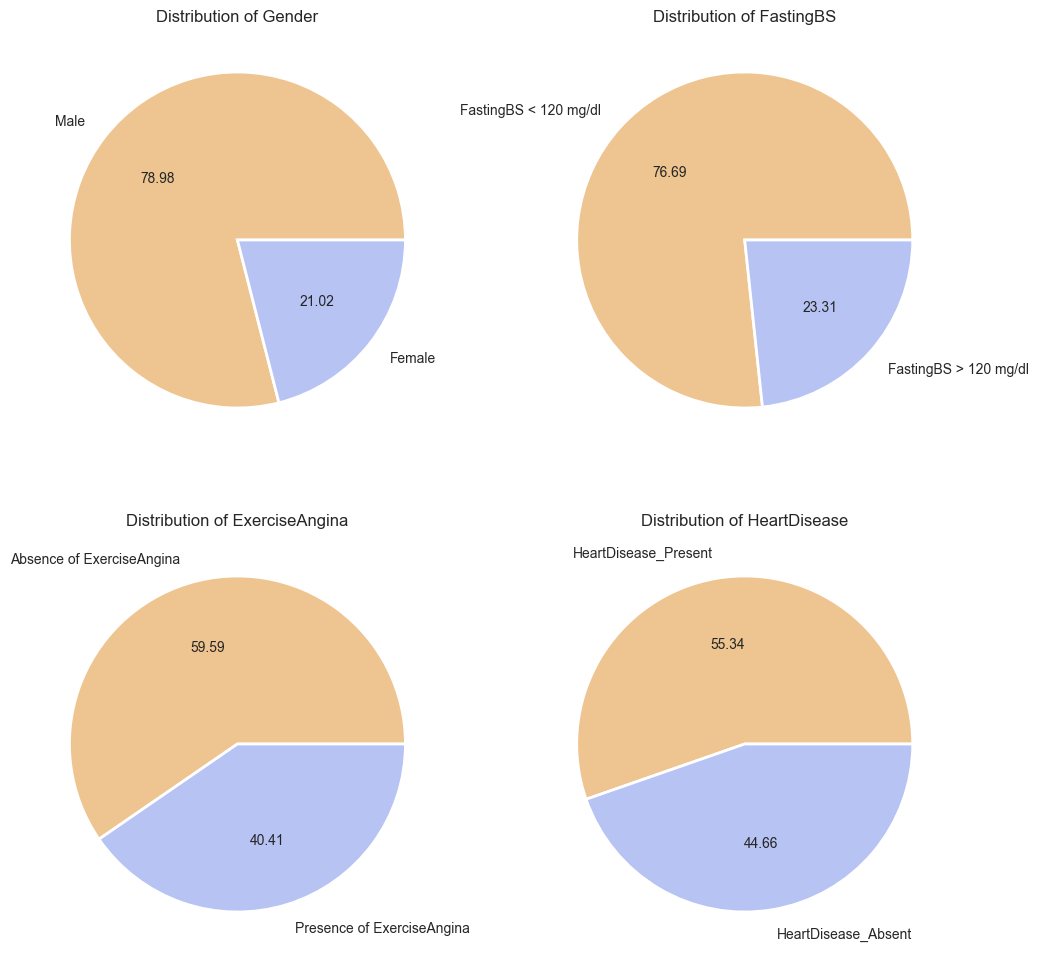

In [12]:
binary_variables = ['Sex','FastingBS','ExerciseAngina','HeartDisease'] 
colors = ['#EEC591', '#B7C3F3']
plt.figure(figsize=(12,12))
plt.subplot(2,2,1)
values = heart_df['Sex'].value_counts()
labels = ['Male','Female']
plt.pie(values, labels=labels, labeldistance=1.15, wedgeprops = { 'linewidth' : 2, 'edgecolor' : 'white' },colors = colors, autopct= '%.2f');
plt.title("Distribution of Gender")
plt.subplot(2,2,2)
values = heart_df['FastingBS'].value_counts()
labels = ['FastingBS < 120 mg/dl','FastingBS > 120 mg/dl']
plt.pie(values, labels=labels, labeldistance=1.15, wedgeprops = { 'linewidth' : 2, 'edgecolor' : 'white' },colors = colors, autopct= '%.2f');
plt.title("Distribution of FastingBS")
plt.subplot(2,2,3)
values = heart_df['ExerciseAngina'].value_counts()
labels = ['Absence of ExerciseAngina','Presence of ExerciseAngina']
plt.pie(values, labels=labels, labeldistance=1.15, wedgeprops = { 'linewidth' : 2, 'edgecolor' : 'white' },colors = colors,autopct= '%.2f');
plt.title("Distribution of ExerciseAngina")
plt.subplot(2,2,4)
values = heart_df['HeartDisease'].value_counts() #'#4F6272', '#B7C3F3' 
labels = ['HeartDisease_Present','HeartDisease_Absent']
plt.pie(values, labels=labels, labeldistance=1.15, wedgeprops = { 'linewidth' : 2, 'edgecolor' : 'white' },colors = colors,autopct= '%.2f');
plt.title("Distribution of HeartDisease")


Text(0.5, 1.0, 'Counts of Chest pain types')

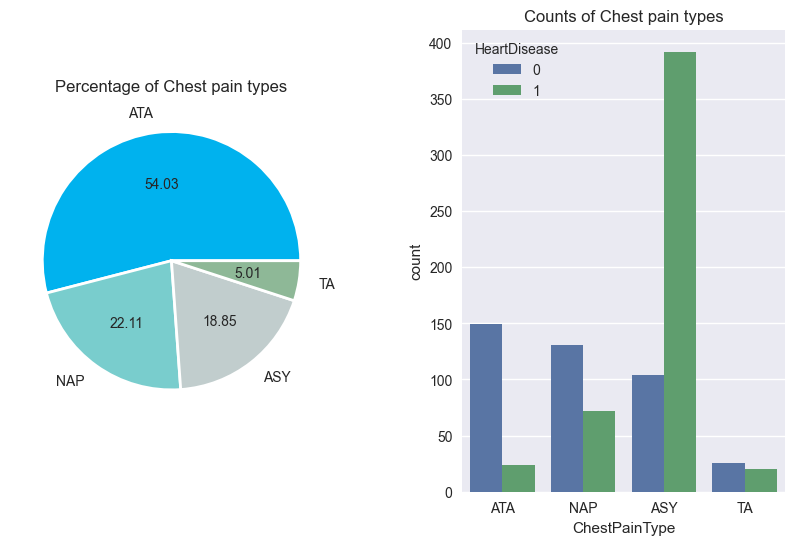

In [13]:
values = heart_df['ChestPainType'].value_counts()
labels = heart_df['ChestPainType'].unique()
colors = ['#00B2EE', '#79CDCD', '#C1CDCD', '#8EB897']
plt.figure(figsize=(10,6))
plt.subplot(1,2,1)
plt.subplots_adjust(wspace=0.4)
plt.pie(values, labels=labels, labeldistance=1.15, wedgeprops = { 'linewidth' : 2, 'edgecolor' : 'white' }, colors=colors,autopct= '%.2f');
plt.title("Percentage of Chest pain types")
plt.subplot(1,2,2)
sns.countplot(x=heart_df['ChestPainType'], hue=heart_df['HeartDisease'])
plt.title("Counts of Chest pain types")

Text(0.5, 1.0, 'Counts of ST_Slope')

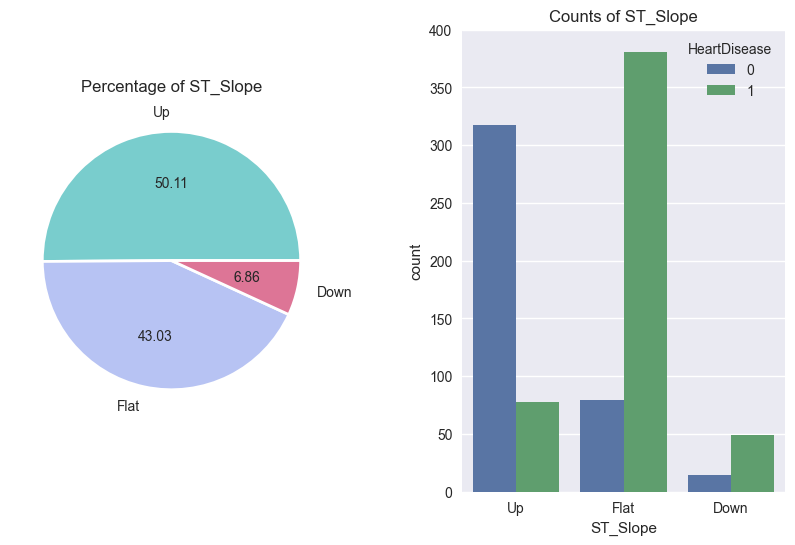

In [14]:
values = heart_df['ST_Slope'].value_counts()
labels = heart_df['ST_Slope'].unique()
colors = ['#79CDCD', '#B7C3F3', '#DD7596', '#8EB897']
plt.figure(figsize=(10,6))
plt.subplot(1,2,1)
plt.subplots_adjust(wspace=0.4)
plt.pie(values, labels=labels, labeldistance=1.15, wedgeprops = { 'linewidth' : 2, 'edgecolor' : 'white' }, colors=colors,autopct= '%.2f');
plt.title("Percentage of ST_Slope")
plt.subplot(1,2,2)
sns.countplot(x=heart_df['ST_Slope'], hue=heart_df['HeartDisease'])
plt.title("Counts of ST_Slope")

Text(0.5, 1.0, 'Counts of RestingECG classes')

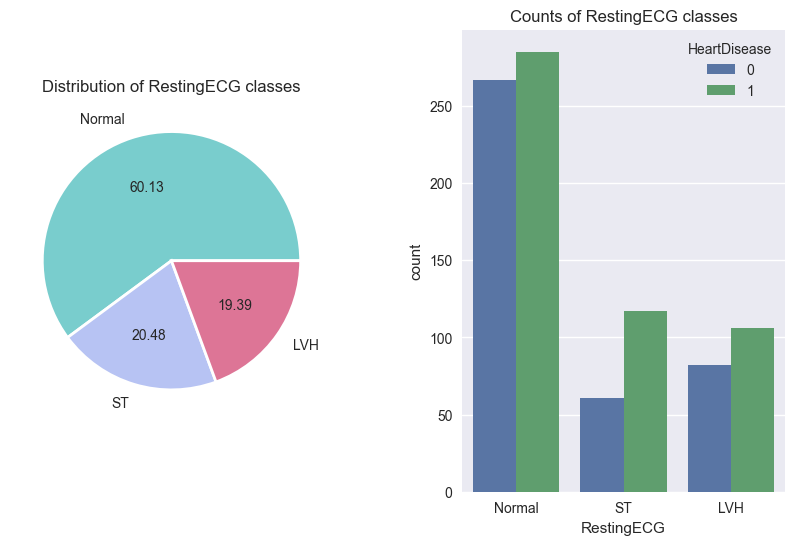

In [15]:
plt.figure(figsize=(10,6))
plt.subplot(1,2,1)
plt.subplots_adjust(wspace=0.4)
values = heart_df['RestingECG'].value_counts()
labels = heart_df['RestingECG'].unique()
colors = ['#79CDCD', '#B7C3F3', '#DD7596', '#8EB897']
plt.pie(values, labels=labels, labeldistance=1.15, wedgeprops = { 'linewidth' : 2, 'edgecolor' : 'white' }, colors=colors,autopct= '%.2f');
plt.title("Distribution of RestingECG classes")
plt.subplot(1,2,2)
sns.countplot(x=heart_df['RestingECG'], hue=heart_df['HeartDisease'])
plt.title("Counts of RestingECG classes")

C:\Users\user1\AppData\Local\Temp\ipykernel_1872\400904521.py:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn")


<Figure size 800x550 with 0 Axes>

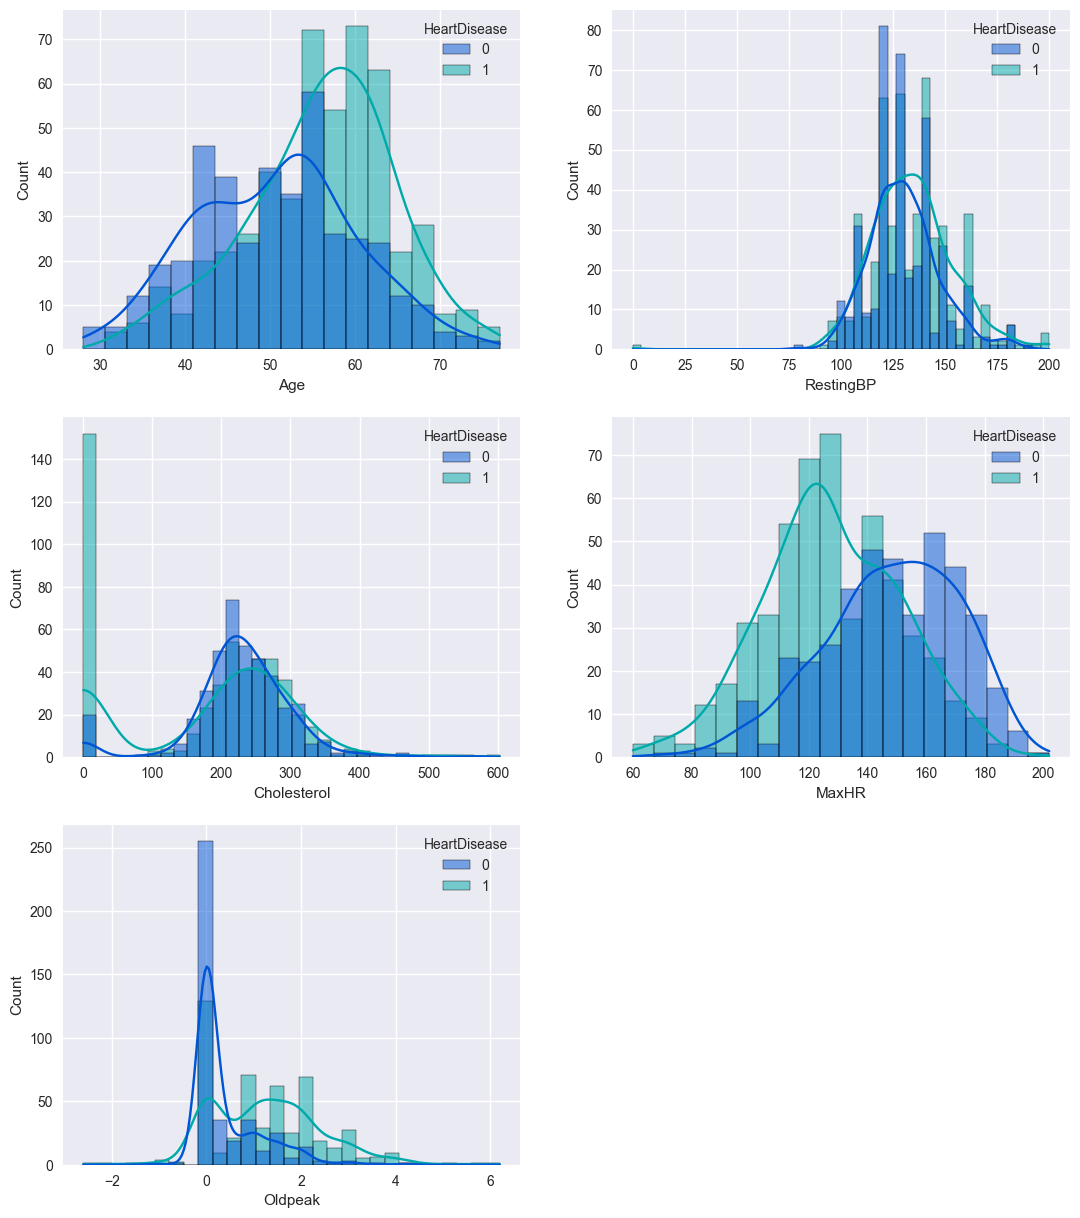

In [16]:
numerical_variables = ['Age','RestingBP','Cholesterol','MaxHR','Oldpeak']
plt.style.use("seaborn")
plt.subplots_adjust(hspace=0.2,wspace = 0.4)
plt.figure(figsize=(13,15))
plt.subplot(3,2,1)
i=1
for feature in heart_df.columns:
    if feature  in numerical_variables :
        plt.subplot(3,2,i)
        sns.histplot(data=heart_df, x=feature, kde=True, palette="winter", hue='HeartDisease')
        i+=1

C:\Users\user1\AppData\Local\Temp\ipykernel_1872\20275577.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x = heart_df['HeartDisease'] , y = heart_df['Sex'],palette= custom_palette)


<Axes: xlabel='HeartDisease', ylabel='Sex'>

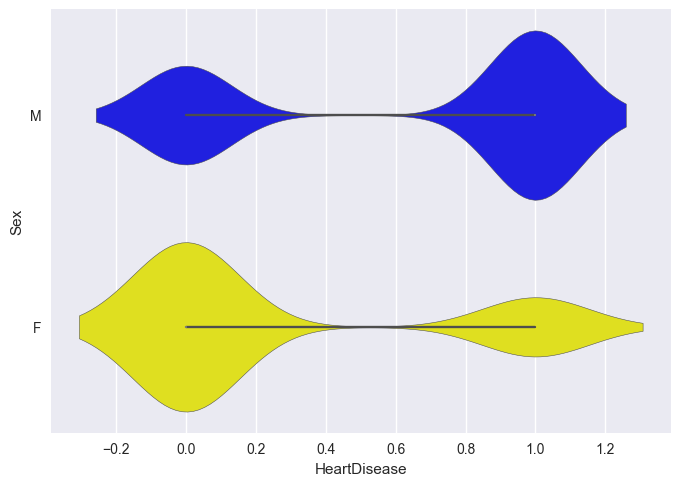

In [17]:
# which specific gender is most likely to have heart Disease
custom_palette = ['#0000FF', '#FFFF00'] 
sns.violinplot(x = heart_df['HeartDisease'] , y = heart_df['Sex'],palette= custom_palette) 


Text(0.5, 1.0, 'Age vs Cholesterol')

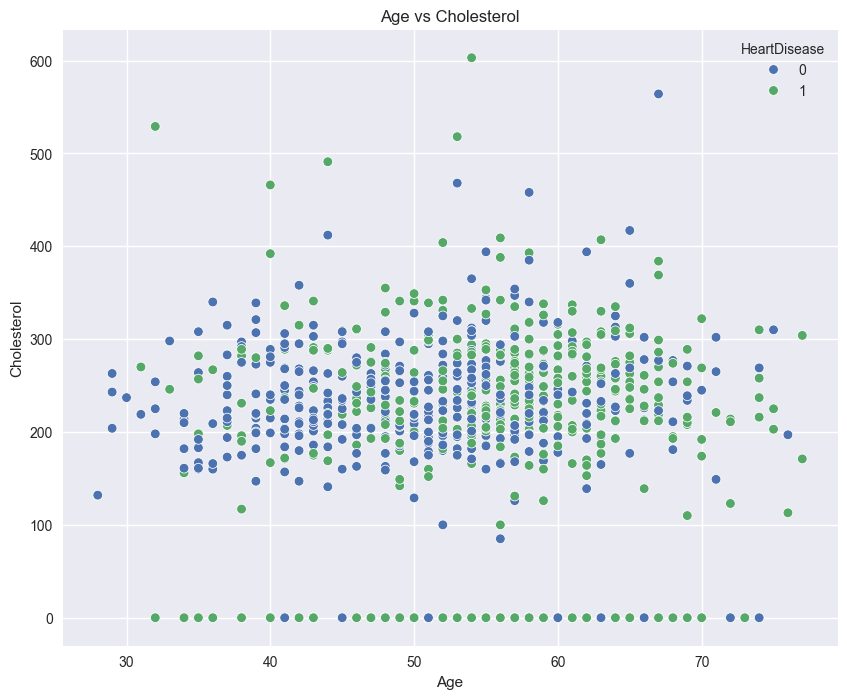

In [18]:
plt.figure(figsize=(10,8))
sns.scatterplot(x=heart_df["Age"], y=heart_df["Cholesterol"],hue = heart_df['HeartDisease']).set_title("Age vs Cholesterol")

Text(0.5, 1.0, 'Age vs MaxHR')

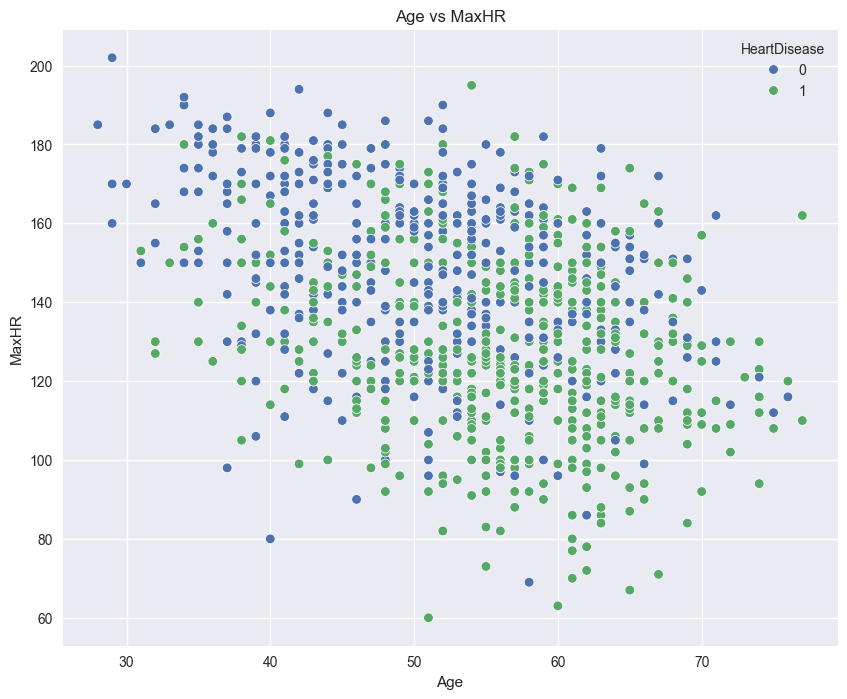

In [19]:
plt.figure(figsize=(10,8))
sns.scatterplot(x=heart_df["Age"], y=heart_df["MaxHR"],hue = heart_df['HeartDisease']).set_title("Age vs MaxHR")

Text(0.5, 1.0, 'Age vs Oldpeak')

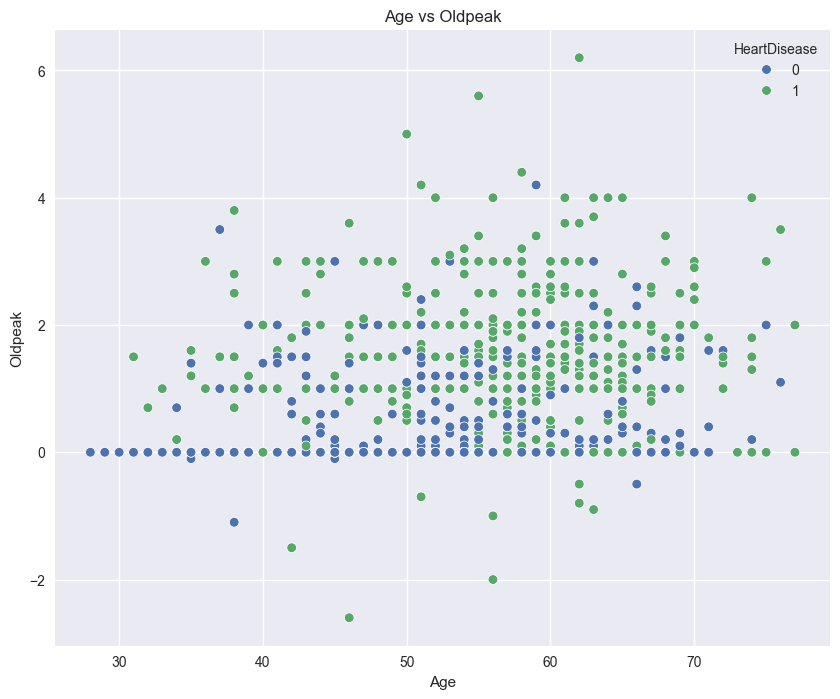

In [20]:
plt.figure(figsize=(10,8))
sns.scatterplot(x=heart_df["Age"], y=heart_df["Oldpeak"],hue = heart_df['HeartDisease']).set_title("Age vs Oldpeak")

                 Data Preprocessing

C:\Users\user1\AppData\Local\Temp\ipykernel_1872\1293048347.py:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn")


<Figure size 800x550 with 0 Axes>

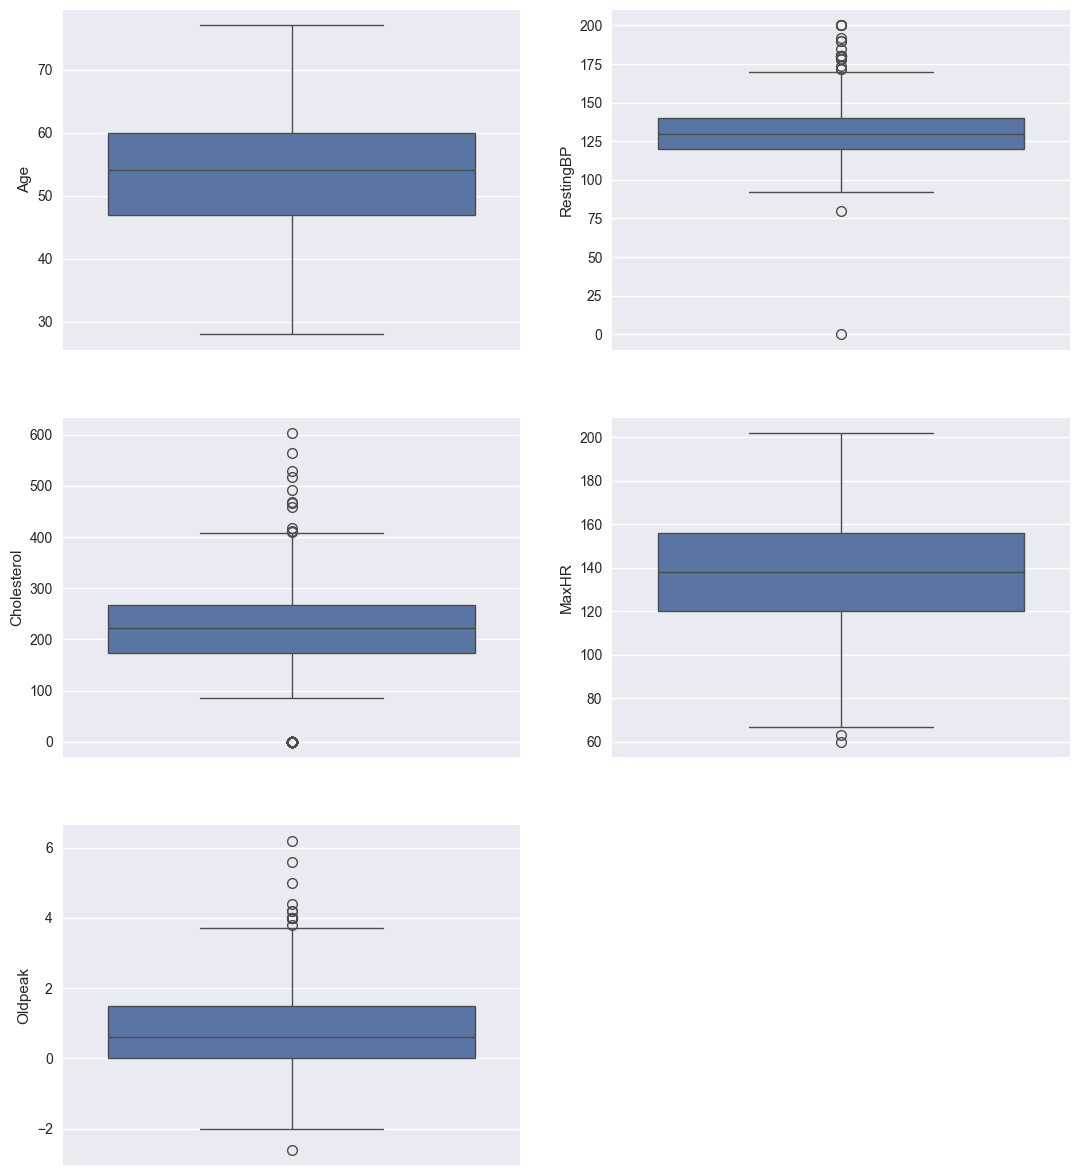

In [21]:
plt.style.use("seaborn")
plt.subplots_adjust(hspace=0.6,wspace = 0.4)
plt.figure(figsize=(13,15))
plt.subplot(3,2,1)
i=1
for feature in heart_df.columns:
    if feature  in numerical_variables :
        plt.subplot(3,2,i)
        sns.boxplot(y=heart_df[feature])
        i+=1

In [22]:
temp = heart_df.copy()

In [23]:
for variable in numerical_variables:
  stat, p = stats.shapiro(temp[variable])

  alpha = 0.05
  if p > alpha:
      print('"{}" looks normally distributed (fail to reject H0)'.format(variable))
  else:
      print('"{}" does not look normally distributed (reject H0)'.format(variable))
  print(" ")

"Age" does not look normally distributed (reject H0)
 
"RestingBP" does not look normally distributed (reject H0)
 
"Cholesterol" does not look normally distributed (reject H0)
 
"MaxHR" does not look normally distributed (reject H0)
 
"Oldpeak" does not look normally distributed (reject H0)
 


In [24]:
# Calculate the IQR of the data
Q1 = temp['Cholesterol'].quantile(0.25)
Q3 = temp['Cholesterol'].quantile(0.75)
IQR = Q3 - Q1

# Calculate the upper and lower bounds for outliers
upper_bound = Q3 + 1.5*IQR
lower_bound = Q1 - 1.5*IQR

# Identify the outliers in the dataframe
outliers = temp[(temp['Cholesterol'] < lower_bound) |  (temp['Cholesterol'] > upper_bound)].dropna()

# Delete the outliers from the dataframe
temp= temp.drop(outliers.index)

In [25]:
Q1 = temp['Oldpeak'].quantile(0.25)
Q3 = temp['Oldpeak'].quantile(0.75)
IQR = Q3 - Q1

upper_bound = Q3 + 1.5*IQR
lower_bound = Q1 - 1.5*IQR

outliers = temp[(temp['Oldpeak'] < lower_bound) |  (temp['Oldpeak'] > upper_bound)].dropna()

temp= temp.drop(outliers.index)

In [26]:
Q1 = temp['RestingBP'].quantile(0.25)
Q3 = temp['RestingBP'].quantile(0.75)
IQR = Q3 - Q1

upper_bound = Q3 + 1.5*IQR
lower_bound = Q1 - 1.5*IQR

outliers = temp[(temp['RestingBP'] < lower_bound) | (temp['RestingBP'] > upper_bound)].dropna()

temp= temp.drop(outliers.index)

In [27]:
Q1 = temp['MaxHR'].quantile(0.25)
Q3 = temp['MaxHR'].quantile(0.75)
IQR = Q3 - Q1


upper_bound = Q3 + 1.5*IQR
lower_bound = Q1 - 1.5*IQR

outliers = temp[(temp['MaxHR'] < lower_bound) | (temp['MaxHR'] > upper_bound)].dropna()

temp= temp.drop(outliers.index)

In [28]:
Q1 = temp['Age'].quantile(0.25)
Q3 = temp['Age'].quantile(0.75)
IQR = Q3 - Q1

upper_bound = Q3 + 1.5*IQR
lower_bound = Q1 - 1.5*IQR

outliers = temp[(temp['Age'] < lower_bound) |  (temp['Age'] > upper_bound)].dropna()

outliers.shape 

(0, 12)

                After  Removing Outliers

In [29]:
temp.shape

(702, 12)

C:\Users\user1\AppData\Local\Temp\ipykernel_1872\3709085663.py:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn")


<Figure size 800x550 with 0 Axes>

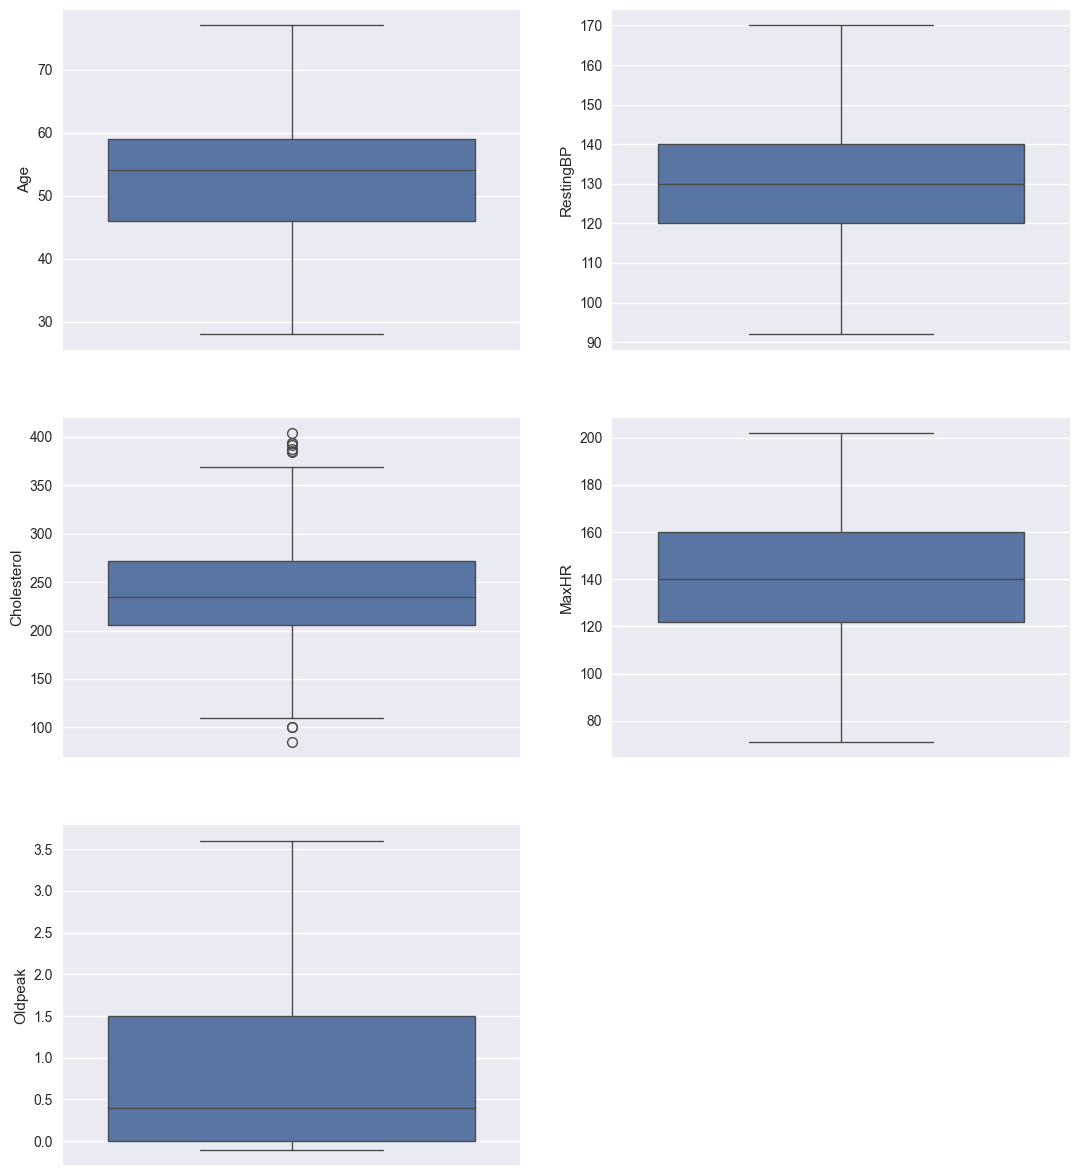

In [30]:
plt.style.use("seaborn")
plt.subplots_adjust(hspace=0.6,wspace = 0.4)
plt.figure(figsize=(13,15))
plt.subplot(3,2,1)
i=1
for feature in temp.columns:
    if feature  in numerical_variables :
        plt.subplot(3,2,i)
        sns.boxplot(y=temp[feature])
        i+=1

c:\Users\user1\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 2000x4000 with 0 Axes>

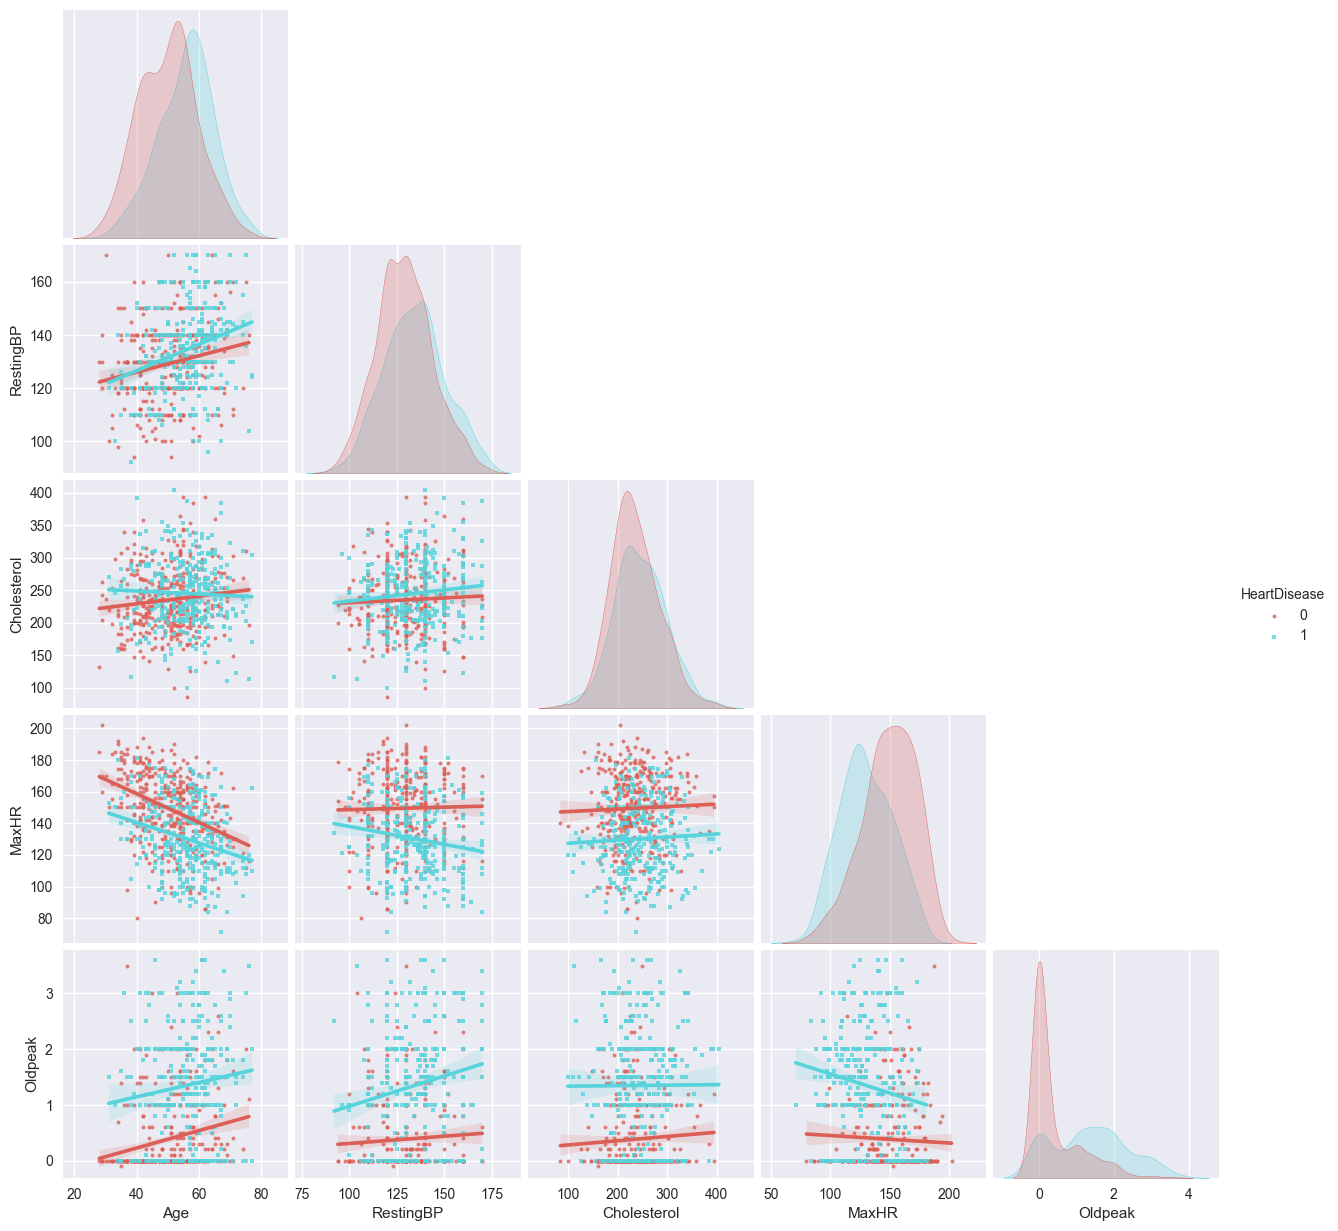

In [31]:
plt.figure(figsize=(20,40))
sns.pairplot(data=temp[numerical_variables + ["HeartDisease"]], hue="HeartDisease", palette='hls', kind="reg", corner=True, markers=["o", "s"], plot_kws={ 'scatter_kws': {'alpha': 0.8, 's':8}})

                       Feature  Engineering

In [32]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.impute import KNNImputer
from sklearn.model_selection import cross_val_score

In [33]:
# encoding the categorical variables
encoded_data = pd.get_dummies(temp, columns = ['ChestPainType','RestingECG'],drop_first=True)
encoded_data = encoded_data.replace({True: 1, False: 0})
encoded_data.head()

,Age,Sex,RestingBP,Cholesterol,FastingBS,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST
0,40,M,140,289,0,172,N,0.0,Up,0,1,0,0,1,0
1,49,F,160,180,0,156,N,1.0,Flat,1,0,1,0,1,0
2,37,M,130,283,0,98,N,0.0,Up,0,1,0,0,0,1
3,48,F,138,214,0,108,Y,1.5,Flat,1,0,0,0,1,0
4,54,M,150,195,0,122,N,0.0,Up,0,0,1,0,1,0


In [34]:
#label encoding of ordinal variables.
temp_data = encoded_data.copy()
names = temp_data.columns
temp_data['Sex'] = temp_data.Sex.map({'M':1, 'F':0})
temp_data['ExerciseAngina']= temp_data.ExerciseAngina.map({'N':0,'Y':1})
temp_data['ST_Slope']= temp_data.ST_Slope.map({'Up':2,'Flat':1, 'Down':0})
temp_data = pd.DataFrame(temp_data, columns = names)

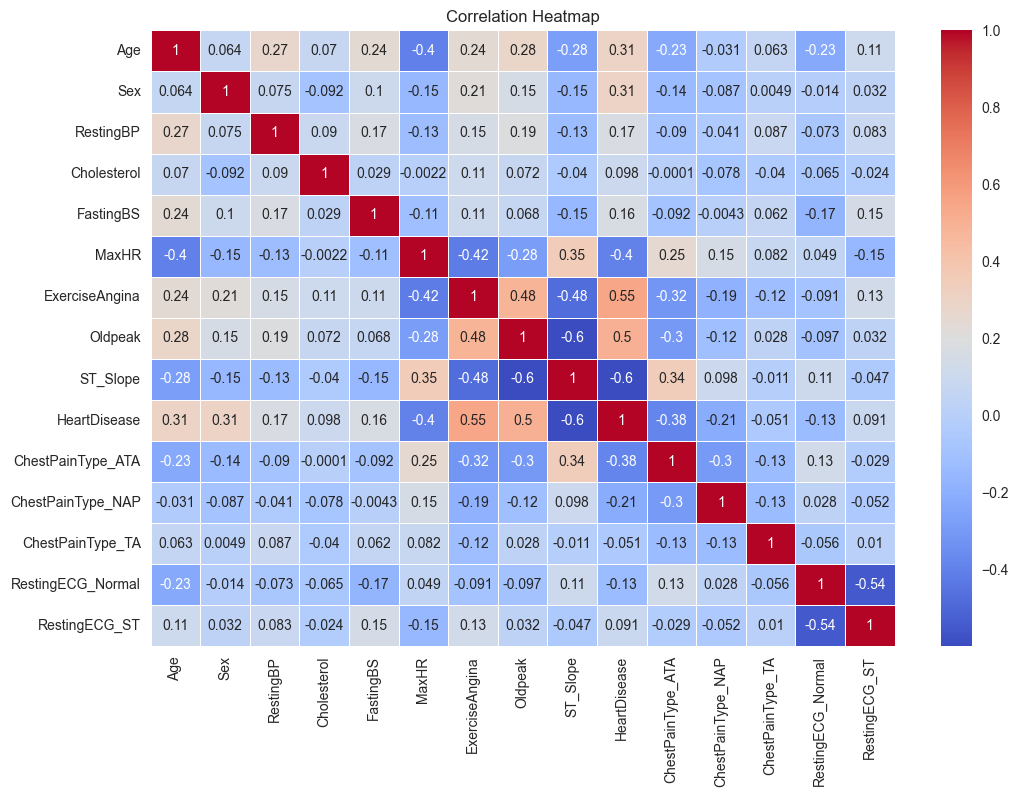

In [35]:
corr_matrix = temp_data.corr()

# Plotting the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()


In [36]:
X = temp_data.drop('HeartDisease', axis = 1)
y = temp_data[['HeartDisease']]


In [37]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [38]:
scaler = StandardScaler()
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test) 


Modelling

In [39]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC, NuSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import recall_score, accuracy_score,roc_curve, auc
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import shap 

c:\Users\user1\AppData\Local\Programs\Python\Python310\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Accuracy: 86.52%
Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.87      0.87        71
           1       0.87      0.86      0.86        70

    accuracy                           0.87       141
   macro avg       0.87      0.87      0.87       141
weighted avg       0.87      0.87      0.87       141

Confusion Matrix:
[[62  9]
 [10 60]]


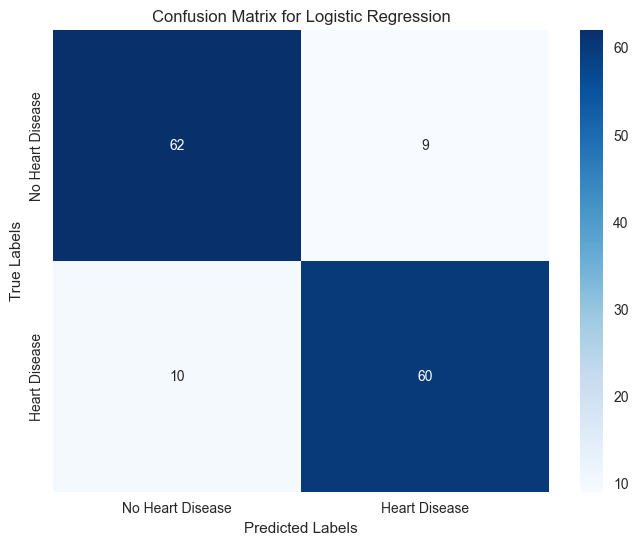

In [54]:
# Initialize the Logistic Regression model
lr = LogisticRegression(random_state=42, max_iter=1000)

# Cross-validation on scaled training data (without PCA)
cv_scores_lr = cross_val_score(lr, scaled_X_train, y_train, cv=5)

# Fit the model on the original training data
lr.fit(scaled_X_train, y_train)

# Predict on the original test data
y_pred_log_reg = lr.predict(scaled_X_test)

# Evaluate the model
# Accuracy score
accuracy_lr = accuracy_score(y_test, y_pred_log_reg)
print(f"Accuracy: {accuracy_lr * 100:.2f}%")

# Classification report
print("Classification Report:")
print(classification_report(y_test, y_pred_log_reg))

# Confusion matrix
cm_lr = confusion_matrix(y_test, y_pred_log_reg)
print("Confusion Matrix:")
print(cm_lr)

# Create a heatmap for the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_lr,annot=True, fmt='d', cmap='Blues', 
            xticklabels=['No Heart Disease', 'Heart Disease'], 
            yticklabels=['No Heart Disease', 'Heart Disease'])

# Add labels and title
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for Logistic Regression')

# Show the plot
plt.show()


Accuracy: 87.94%
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.89      0.88        71
           1       0.88      0.87      0.88        70

    accuracy                           0.88       141
   macro avg       0.88      0.88      0.88       141
weighted avg       0.88      0.88      0.88       141

Confusion Matrix:
[[63  8]
 [ 9 61]]


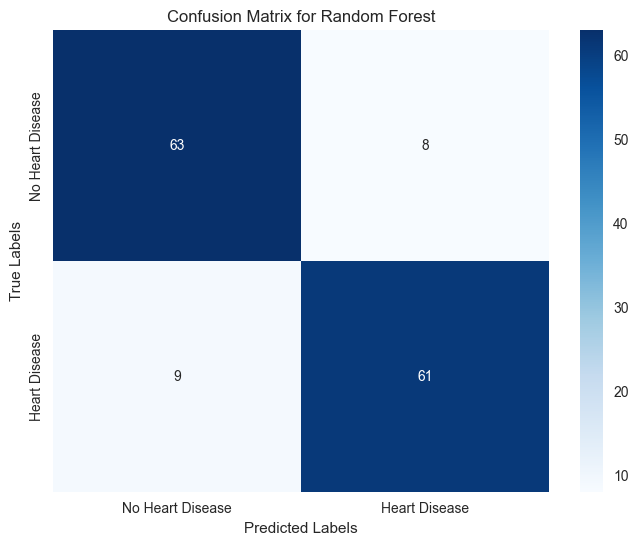

In [55]:
# Initialize the Random Forest model
rf = RandomForestClassifier(random_state=42, n_jobs=1)
cv_scores = cross_val_score(rf, scaled_X_train, y_train, cv=5)

# Fit the model on the PCA-transformed training data
rf.fit(scaled_X_train, y_train)

# Predict on the PCA-transformed test data
y_pred = rf.predict(scaled_X_test)

# Evaluate the model
# Accuracy score
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

# Classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))
#confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

# Create a heatmap for the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
xticklabels=['No Heart Disease', 'Heart Disease'], 
yticklabels=['No Heart Disease', 'Heart Disease'])

# Add labels and title
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for Random Forest')

# Show the plot
plt.show()


In [41]:
dt = DecisionTreeClassifier()
cv_scores = cross_val_score(dt, scaled_X_train, y_train, cv=5)
dt.fit(scaled_X_train, y_train)
y_pred = dt.predict(scaled_X_test)

# Evaluation of the model
# Accuracy score
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

# Classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Accuracy: 79.43%
Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.77      0.79        71
           1       0.78      0.81      0.80        70

    accuracy                           0.79       141
   macro avg       0.79      0.79      0.79       141
weighted avg       0.79      0.79      0.79       141

Confusion Matrix:
[[55 16]
 [13 57]]


In [42]:
# Initialize the K-Nearest Neighbors model
knn = KNeighborsClassifier(n_neighbors=5)  
cv_scores = cross_val_score(knn, scaled_X_train, y_train, cv=5)

# Fit the model on the scaled training data
knn.fit(scaled_X_train, y_train)

# Predict on the  test data
y_pred_knn = knn.predict(scaled_X_test)

# Evaluate the model
# Accuracy score
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print(f"Accuracy with KNN: {accuracy_knn * 100:.2f}%")

# Classification report
print("Classification Report with KNN:")
print(classification_report(y_test, y_pred_knn))

# Confusion matrix
print("Confusion Matrix with KNN:")
print(confusion_matrix(y_test, y_pred_knn))

c:\Users\user1\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\Users\user1\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Accuracy with KNN: 83.69%
Classification Report with KNN:
              precision    recall  f1-score   support

           0       0.83      0.85      0.84        71
           1       0.84      0.83      0.83        70

    accuracy                           0.84       141
   macro avg       0.84      0.84      0.84       141
weighted avg       0.84      0.84      0.84       141

Confusion Matrix with KNN:
[[60 11]
 [12 58]]


c:\Users\user1\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\Users\user1\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\Users\user1\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\Users\user1\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neighbors\_classification.py:238: 

Accuracy: 85.82%
Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.85      0.86        71
           1       0.85      0.87      0.86        70

    accuracy                           0.86       141
   macro avg       0.86      0.86      0.86       141
weighted avg       0.86      0.86      0.86       141

Confusion Matrix:
[[60 11]
 [ 9 61]]


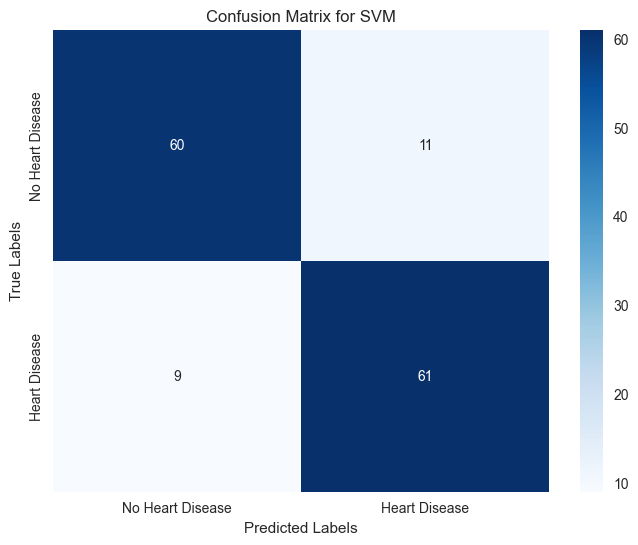

In [56]:
# Initialize the SVM model
svm = SVC(kernel='linear', random_state=42)

# Cross-validation on scaled training data (without PCA)
cv_scores_svm = cross_val_score(svm, scaled_X_train, y_train, cv=5)

# Fit the model on the scaled training data
svm.fit(scaled_X_train, y_train)

# Predict on the scaled test data
y_pred_svm = svm.predict(scaled_X_test)

# Evaluate the model
# Accuracy score
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print(f"Accuracy: {accuracy_svm * 100:.2f}%")

# Classification report
print("Classification Report:")
print(classification_report(y_test, y_pred_svm))

# Confusion matrix
cm_svm = confusion_matrix(y_test, y_pred_svm)
print("Confusion Matrix:")
print(cm_svm)

# Create a heatmap for the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_svm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['No Heart Disease', 'Heart Disease'], 
            yticklabels=['No Heart Disease', 'Heart Disease'])

# Add labels and title
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for SVM')

# Show the plot
plt.show()


Hyperparameter Tuning


In [43]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
import numpy as np

# Data preparation (assumed X and y are your features and target)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scaling the features
scaler = StandardScaler()
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

# Reshape y to avoid DataConversionWarning
y_train = np.ravel(y_train)
y_test = np.ravel(y_test)

# Initialize the Logistic Regression model
lr = LogisticRegression()

# Define the parameter grid, restricting incompatible combinations
param_distributions = {
    'solver': ['lbfgs', 'liblinear'],  # Valid solvers for Logistic Regression
    'penalty': ['l2'],  # Penalty valid for lbfgs and liblinear solvers
    'C': np.logspace(-4, 4, 50),  # Regularization strength
    'max_iter': [100, 200, 300]  # Maximum number of iterations
}

# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(
    lr, param_distributions, n_iter=50, cv=5, verbose=1, n_jobs=-1, random_state=42
)

# Fit RandomizedSearchCV
random_search.fit(scaled_X_train, y_train)

# Get the best parameters and evaluate the model
best_params = random_search.best_params_
print(f"Best Parameters: {best_params}")

# Predictions using the best model
y_pred = random_search.predict(scaled_X_test)

# Accuracy score
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy after tuning: {accuracy * 100:.2f}%")

# Detailed classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best Parameters: {'solver': 'lbfgs', 'penalty': 'l2', 'max_iter': 200, 'C': 0.05963623316594643}
Accuracy after tuning: 86.52%
Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.87      0.87        71
           1       0.87      0.86      0.86        70

    accuracy                           0.87       141
   macro avg       0.87      0.87      0.87       141
weighted avg       0.87      0.87      0.87       141

Confusion Matrix:
[[62  9]
 [10 60]]


Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best Parameters: {'n_estimators': 100, 'min_samples_split': 10, 'min_samples_leaf': 4, 'max_features': 'log2', 'max_depth': 20, 'bootstrap': False}
Accuracy after tuning: 89.36%
Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.90      0.90        71
           1       0.90      0.89      0.89        70

    accuracy                           0.89       141
   macro avg       0.89      0.89      0.89       141
weighted avg       0.89      0.89      0.89       141

Confusion Matrix:
[[64  7]
 [ 8 62]]


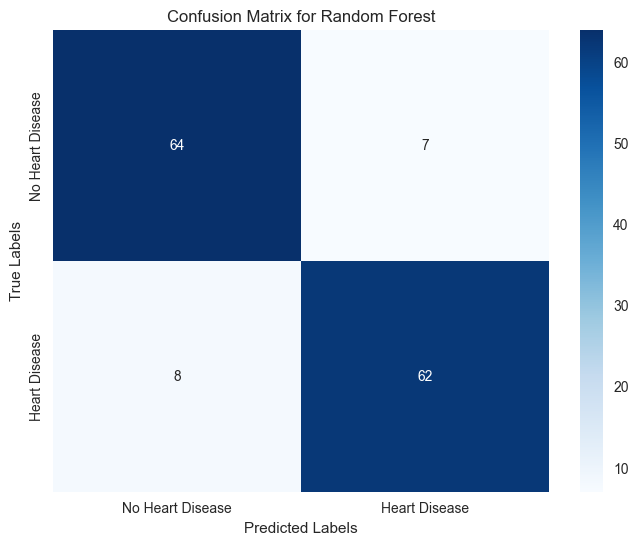

In [44]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Initialize the Random Forest model
rf = RandomForestClassifier(random_state=42)

# Define the parameter grid for RandomizedSearchCV
param_distributions = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_features': ['sqrt', 'log2', None],  # Corrected: removed 'auto'
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Initialize RandomizedSearchCV
random_search_rf = RandomizedSearchCV(
    rf, param_distributions, n_iter=50, cv=5, verbose=1, n_jobs=-1, random_state=42
)

# Fit RandomizedSearchCV on the scaled training data
random_search_rf.fit(scaled_X_train, y_train)

# Get the best parameters and evaluate the model
best_params_rf = random_search_rf.best_params_
print(f"Best Parameters: {best_params_rf}")

# Predictions using the best Random Forest model
y_pred_rf = random_search_rf.predict(scaled_X_test)

# Accuracy score
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Accuracy after tuning: {accuracy_rf * 100:.2f}%")

# Detailed classification report
print("Classification Report:")
print(classification_report(y_test, y_pred_rf))

# Confusion matrix
cm_rf = confusion_matrix(y_test, y_pred_rf)
print("Confusion Matrix:")
print(cm_rf)

# Create a heatmap for the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['No Heart Disease', 'Heart Disease'], 
            yticklabels=['No Heart Disease', 'Heart Disease'])

# Add labels and title
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for Random Forest')

# Show the plot
plt.show()


Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best parameters found: {'kernel': 'linear', 'gamma': 'auto', 'degree': 2, 'C': 0.08858667904100823}
Best cross-validation accuracy: 0.85
Accuracy of the best SVM model: 85.82%
Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.85      0.86        71
           1       0.85      0.87      0.86        70

    accuracy                           0.86       141
   macro avg       0.86      0.86      0.86       141
weighted avg       0.86      0.86      0.86       141

Confusion Matrix:
[[60 11]
 [ 9 61]]


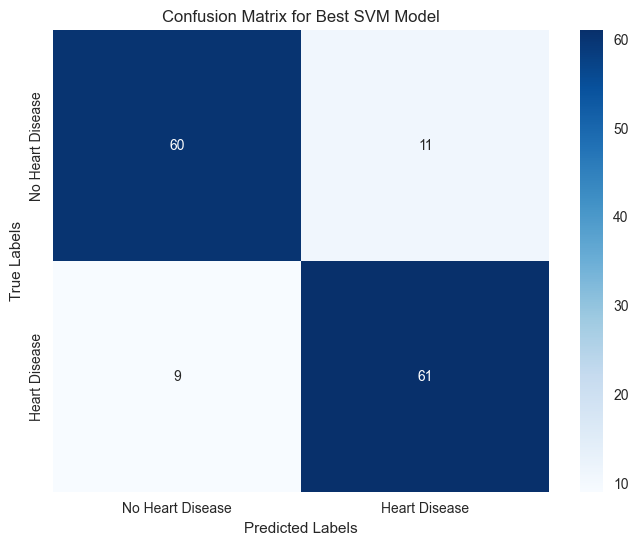

In [57]:
# Import the necessary modules
from sklearn.svm import SVC
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Initialize the SVM model
svm = SVC(random_state=42)

# Set the hyperparameter grid for RandomizedSearchCV
param_distributions = {
    'C': np.logspace(-4, 4, 20),  # Regularization parameter
    'kernel': ['linear', 'rbf', 'poly', 'sigmoid'],  # Kernel types
    'gamma': ['scale', 'auto'],  # Kernel coefficient for ‘rbf’, ‘poly’ and ‘sigmoid’
    'degree': [2, 3, 4]  # Degree of the polynomial kernel function (used if kernel='poly')
}

# Set up the RandomizedSearchCV
random_search_svm = RandomizedSearchCV(svm, param_distributions, n_iter=50, scoring='accuracy', 
                                       cv=5, verbose=1, random_state=42, n_jobs=-1)

# Fit the RandomizedSearchCV on the scaled training data
random_search_svm.fit(scaled_X_train, y_train)

# Print the best parameters and best score from RandomizedSearchCV
print(f"Best parameters found: {random_search_svm.best_params_}")
print(f"Best cross-validation accuracy: {random_search_svm.best_score_:.2f}")

# Use the best model to predict on the test data
best_svm = random_search_svm.best_estimator_
y_pred_best_svm = best_svm.predict(scaled_X_test)

# Evaluate the best model
accuracy_best_svm = accuracy_score(y_test, y_pred_best_svm)
print(f"Accuracy of the best SVM model: {accuracy_best_svm * 100:.2f}%")

# Classification report
print("Classification Report:")
print(classification_report(y_test, y_pred_best_svm))

# Confusion matrix
cm_best_svm = confusion_matrix(y_test, y_pred_best_svm)
print("Confusion Matrix:")
print(cm_best_svm)

# Create a heatmap for the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_best_svm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['No Heart Disease', 'Heart Disease'], 
            yticklabels=['No Heart Disease', 'Heart Disease'])

# Add labels and title
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for Best SVM Model')

# Show the plot
plt.show()


Training of some gradient boosting classifiers

In [45]:
from catboost import CatBoostClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier



In [46]:
from sklearn.metrics import roc_auc_score, recall_score, precision_score, f1_score

def score_summary(names, classifiers, X_train, y_train, X_test, y_test):
    # Initialize an empty DataFrame to store the results
    results = pd.DataFrame(columns=["Classifier", "Accuracy", "ROC_AUC", "Recall", "Precision", "F1"])
    
    for name, clf in zip(names, classifiers):
        # Fit the classifier
        clf.fit(X_train, y_train)
        
        # Predict on the test set
        y_pred = clf.predict(X_test)
        
        # Calculate metrics
        accuracy = (y_pred == y_test).mean()
        roc_auc = roc_auc_score(y_test, clf.predict_proba(X_test)[:, 1])
        recall = recall_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred)
        
        # Create a DataFrame for the current classifier's results
        current_result = pd.DataFrame({
            "Classifier": [name],
            "Accuracy": [accuracy],
            "ROC_AUC": [roc_auc],
            "Recall": [recall],
            "Precision": [precision],
            "F1": [f1]
        })
        
        # Concatenate the current result with the results DataFrame
        results = pd.concat([results, current_result], ignore_index=True)
    
    return results

# Example usage
names_boost = ["CatBoost", "XGBoost", "LightGBM"]
classifiers = [CatBoostClassifier(), XGBClassifier(), LGBMClassifier()]

# Call the score_summary function
summary_df = score_summary(names_boost, classifiers, scaled_X_train, y_train, scaled_X_test, y_test)

# Display the styled DataFrame
summary_df.sort_values(by='Accuracy', ascending=False)\
    .style.background_gradient(cmap='coolwarm')\
    .bar(subset=["ROC_AUC"], color='#6495ED')\
    .bar(subset=["Recall"], color='#ff355d')\
    .bar(subset=["Precision"], color='lightseagreen')\
    .bar(subset=["F1"], color='gold')


Learning rate set to 0.008049
0:	learn: 0.6866061	total: 155ms	remaining: 2m 35s
1:	learn: 0.6827442	total: 158ms	remaining: 1m 18s
2:	learn: 0.6772926	total: 166ms	remaining: 55.2s
3:	learn: 0.6728249	total: 170ms	remaining: 42.4s
4:	learn: 0.6677240	total: 179ms	remaining: 35.6s
5:	learn: 0.6624261	total: 189ms	remaining: 31.2s
6:	learn: 0.6568478	total: 198ms	remaining: 28.1s
7:	learn: 0.6531371	total: 202ms	remaining: 25s
8:	learn: 0.6485529	total: 209ms	remaining: 23.1s
9:	learn: 0.6435583	total: 224ms	remaining: 22.2s
10:	learn: 0.6379710	total: 236ms	remaining: 21.2s
11:	learn: 0.6331177	total: 246ms	remaining: 20.3s
12:	learn: 0.6289552	total: 254ms	remaining: 19.3s
13:	learn: 0.6239991	total: 267ms	remaining: 18.8s
14:	learn: 0.6195106	total: 275ms	remaining: 18s
15:	learn: 0.6144655	total: 286ms	remaining: 17.6s
16:	learn: 0.6099341	total: 296ms	remaining: 17.1s
17:	learn: 0.6071506	total: 301ms	remaining: 16.4s
18:	learn: 0.6040083	total: 312ms	remaining: 16.1s
19:	learn: 0.

,Classifier,Accuracy,ROC_AUC,Recall,Precision,F1
0,CatBoost,0.886525,0.952918,0.885714,0.885714,0.885714
1,XGBoost,0.872340,0.938833,0.871429,0.871429,0.871429
2,LightGBM,0.858156,0.947887,0.842857,0.867647,0.855072


In [47]:
from sklearn.model_selection import GridSearchCV
rs_params = {
    'num_leaves': [20, 100],
    'max_depth': [5, 15],
    'min_data_in_leaf': [80, 120], 
}
rs_cv = GridSearchCV(estimator=LGBMClassifier(random_state=42, verbose=-1), 
                           param_grid=rs_params, 
                           cv = 5)

rs_cv.fit(scaled_X_train, y_train)
params = rs_cv.best_params_
params

{'max_depth': 5, 'min_data_in_leaf': 80, 'num_leaves': 20}

In [48]:
from lightgbm import LGBMClassifier
from sklearn.metrics import classification_report, accuracy_score

# Initialize LGBMClassifier with the best parameters from GridSearchCV
lgbm = LGBMClassifier(**params, random_state=42, verbose=-1)

# Fit the model on the training data
lgbm.fit(scaled_X_train, y_train)

# Predict on the validation/test data
y_pred = lgbm.predict(scaled_X_test)  # Change to X_test if you have a separate test set

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)  # Change to y_test if you use a separate test set
print(f"Accuracy: {accuracy * 100:.2f}%")

# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))  # Change to y_test if using a separate test set


Accuracy: 87.23%
Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.89      0.88        71
           1       0.88      0.86      0.87        70

    accuracy                           0.87       141
   macro avg       0.87      0.87      0.87       141
weighted avg       0.87      0.87      0.87       141



Random forest stands to be our best performing model